<a href="https://colab.research.google.com/github/YipingPan/TensorBoard-LIME-KerasTuner/blob/master/Copy_of_TensorBoard%2C_LIME%2C_Keras_Tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Three practical tools: TensorBoard, LIME, Keras Tuner

# Section 1: Run experiments and visualize your results using TensorBoard

Deep Learning is a new and developing field. Frequently, papers are published introducing new activation functions, weight initialization strategies,  optimizers, and layers. These papers often include results on large dataets (ImageNet), but whether the techniques they introduce will generalize to your datasets (which are often much smaller) remains unclear. The best way to determine that is by running an experiment.

## The final training curves can be found in:
## https://tensorboard.dev/experiment/2EJY7DakRSqZgimWbwMx2w/

## Swish

The current "default" activation function is ReLU (informally, our experience is that while it may not be optimal for all datasets, it is usually a reasonable choice). In the paper [Searching for Activation Functions](https://arxiv.org/abs/1710.05941), the authors propose a new activation function called "Swish", which they believe may become the default in the future. 


## 1a) Why is ReLU activation prefered over Sigmoid?


> 1.RELU is better in efficiency since for its positive part there will be constant gradient. Instead, the gradients in Sigmoid might be vanishing when x is increasing.


> 2.RELU results in more sparse representation since it will cause many zero values.

## 1b) What is the Vanishing Gradient problem? Specifically, when and why does it occur in a MLP?

#### Vanishing Gradient problem is:
> the gradient of the network's output with respect to the parameters in the early layers in MLP become extremely small, so that even large change of values in early layers doesn't have a big effect on the output.

#### it occurs when:
> the selected activation functions are trying to mapping/squashing a large input range into a small input range, like sigmoid [0,1]; or the function is very flat on most part of curve.


## 1c) Implement the Swish activation function using TensorFlow 2.1

In [0]:
try:
  %tensorflow_version 2.x # enable TF 2.x in Colab
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)


def swish(x):
  return x * tf.nn.sigmoid(x)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # enable TF 2.x in Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0-rc2



## 1d) Run an experiment to see whether Swish is helpful on a small dataset

- Choose a small datasets (e.g., CIFAR-10). 
- Train two NNs: One using ReLu activation, and one using your Swish implementation. 
- Visualize the learning curves for training & validation loss and accuracy using TensorBoard.dev (you can find starter code for TensorBoard.dev at the bottom of this notebook). 
- Fix the TensorFlow random seed before running these experiments, so your results are reproducibile (you can find a notebook on CourseWorks that demonstrates how to fix the seed).


In [0]:
# example code for TensorBoard.dev at the bottom of this notebook
from tensorflow.keras import layers, models
import IPython.display as display
import matplotlib.pyplot as plt
import random
import time
import numpy as np
random.seed(42) 
np.random.seed(42) 
tf.random.set_seed(42)

In [0]:
(xtrain, ytrain),(xtest, ytest) = tf.keras.datasets.cifar10.load_data()
xtrain, xtest = xtrain/255.0, xtest/255.0
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


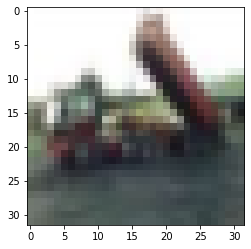

In [0]:
plt.imshow(xtrain[2])

In [0]:
# conv,conv,maxpool,dropout,conv,flatten,dense,dropout,dense
model = models.Sequential([
                          layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding = 'same'),
                          layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Dropout(rate = 0.25),
                          layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'),
                          layers.Flatten(),
                          layers.Dense(64,activation = 'relu'),
                          layers.Dropout(rate=0.25),
                          layers.Dense(10, activation='softmax')
])
model2 = models.Sequential([
                          layers.Conv2D(64, (3, 3), activation=swish, input_shape=(32, 32, 3), padding = 'same'),
                          layers.Conv2D(64, (3, 3), activation=swish,  padding = 'same'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Dropout(rate = 0.25),
                          layers.Conv2D(64, (3, 3), activation=swish, padding = 'same'),
                          layers.Flatten(),
                          layers.Dense(64,activation = swish),
                          layers.Dropout(rate=0.25),
                          layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# model.fit(xtrain, ytrain,epochs=5)
# model.evaluate(xtest,ytest)

In [0]:
# model2.fit(xtrain, ytrain,epochs=5)
# model2.evaluate(xtest,ytest)

In [0]:
import datetime 
import os
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

Writing logs to ./tensorboard-logs/20200408-214048


In [0]:
!pip install -U tensorboard

Requirement already up-to-date: tensorboard in /usr/local/lib/python3.6/dist-packages (2.2.0)


In [0]:
!rm -rf ./tensorboard-logs/ # Clear any logs from previous runs

In [0]:
exp_dir = os.path.join(log_dir, "exp_relu")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(xtrain,
          ytrain,
          epochs=10, 
          validation_data=(xtest, ytest), 
          callbacks=[tb_callback])


exp_dir = os.path.join(log_dir, "exp_swish")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model2.fit(xtrain,
          ytrain,
          epochs=10, 
          validation_data=(xtest, ytest), 
          callbacks=[tb_callback])


Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6112 - accuracy: 0.4115 - val_loss: 1.1859 - val_accuracy: 0.5787
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2097 - accuracy: 0.5622 - val_loss: 1.0216 - val_accuracy: 0.6352
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0545 - accuracy: 0.6237 - val_loss: 0.9440 - val_accuracy: 0.6686
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9510 - accuracy: 0.6606 - val_loss: 0.9150 - val_accuracy: 0.6813
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8791 - accuracy: 0.6855 - val_loss: 0.8607 - val_accuracy: 0.7033
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8115 - accuracy: 0.7080 - val_loss: 0.8706 - val_accuracy: 0.7002
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7613 - accuracy: 0.7255 - val_loss: 0.8635 - val_ac

In [0]:
!tensorboard dev upload --logdir "$log_dir"

Upload started and will continue reading any new data as it's added
to the logdir. To stop uploading, press Ctrl-C.
View your TensorBoard live at: https://tensorboard.dev/experiment/2EJY7DakRSqZgimWbwMx2w/

Upload stopped. View your TensorBoard at https://tensorboard.dev/experiment/2EJY7DakRSqZgimWbwMx2w/
^C


.## 1e) 
- Did Swish help your NNs reach a higher validation accuracy? 
- Did it reduce the time (in terms of training epochs) needed to reach a certain accuracy?
- Please include the URLs showing the results of your experiments in TensorBoard.dev to justify your results.


> No, for validation set, relu is slightly better than Swish at the end.

> Yes, it could reach a certain accuracy faster than relu.

> URL: https://tensorboard.dev/experiment/2EJY7DakRSqZgimWbwMx2w/

# Section 2: Use LIME to explain an image classifier

Explaining and interpreting models is a new and increasingly important area of Deep Learning. In this section, you will gain experience using a recent (and relatively simple) technique called LIME.


## 2a) Read the paper [ConvNets and ImageNet Beyond Accuracy: Understanding Mistakes and Uncovering Biases](https://arxiv.org/abs/1711.11443) then answer the following two questions:
- Why would a model misclassify a professional sports player based on the color of their skin?
- What changes would you make to the training set to correct this behavior?


> Because the top 1 (most important) feautre or super pixels depict the skin color of the players

> We should also make sure in other classes, the skin colors features are also as strongly represented as those in images labeled basketball players, in order to mitigate the effect and importance of the skin color feature.







## Programming questions

## 2b) Read the paper ["Why Should I Trust You?": Explaining the Predictions of Any Classifier](https://arxiv.org/abs/1602.04938) then practice using LIME by adding code below to do the following:
- Install LIME
- Download an image from the web (using `!wget` or a similar utility).
- Classify your image using Inception-V3 (or another famous architecture, using weights pretrained on ImageNet).
- Display the top three predicted classes (e.g., baseball player) and confidence scores.
- Use LIME to provide evidence for and against each of the top three predictions (e.g., display the regions of an image that LIME found to correlate most strongly with and against the predicted class).

In [0]:
# TODO: your code here
# You may add additional text cells if helpful
! pip install lime
! pip install Pillow==7.1.1

  Using cached https://files.pythonhosted.org/packages/85/5e/e91792f198bbc5a0d7d3055ad552bc4062942d27eaf75c3e2783cf64eae5/Pillow-5.4.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.1.1
    Uninstalling Pillow-7.1.1:
      Successfully uninstalled Pillow-7.1.1


  Using cached https://files.pythonhosted.org/packages/ba/90/8a24e6220cfcf6a3a0162535d5b926e774117e384ff921908e07e4c92bda/Pillow-7.1.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: lime 0.2.0.0 has requirement pillow==5.4.1, but you'll have pillow 7.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1


In [0]:
#!wget https://photos7.motorcar.com/used-2017-lamborghini-aventador_sv--8431-18603473-3-1024.jpg
!wget https://media.voltron.voanews.com/Drupal/01live-166/styles/sourced/s3/2019-04/3ED6FCAB-D280-4197-8B02-BCCD9846076A.jpg?itok=EKczHCGX -O panda.jpg

--2020-04-08 21:49:36--  https://media.voltron.voanews.com/Drupal/01live-166/styles/sourced/s3/2019-04/3ED6FCAB-D280-4197-8B02-BCCD9846076A.jpg?itok=EKczHCGX
Resolving media.voltron.voanews.com (media.voltron.voanews.com)... 184.50.175.59, 2a02:26f0:60:3a7::e9d, 2a02:26f0:60:3ab::e9d
Connecting to media.voltron.voanews.com (media.voltron.voanews.com)|184.50.175.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519173 (507K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 507.00K  --.-KB/s    in 0.02s   

2020-04-08 21:49:36 (23.9 MB/s) - ‘panda.jpg’ saved [519173/519173]



##### get InceptionV3 model

In [0]:
import tensorflow as tf
model = tf.keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### read and preprocess the image

(2330, 3500, 3)

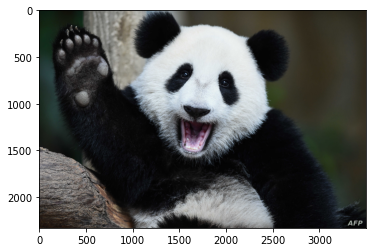

In [0]:
import matplotlib.pyplot as plt
#image = plt.imread('used-2017-lamborghini-aventador_sv--8431-18603473-3-1024.jpg')
image = plt.imread("panda.jpg")
plt.imshow(image)
image.shape

(1, 299, 299, 3)


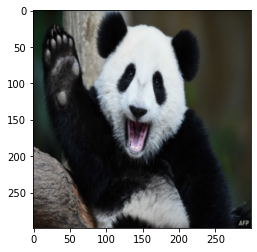

In [0]:
import numpy as np
from skimage import transform
def preprocess(image):
   image = transform.resize(image, (299, 299, 3))
   image = np.expand_dims(image, axis=0)
   return image
images = preprocess(image)
print(images.shape)
plt.imshow(images[0])

##### make a prediction
###### top 3 is: giant panda, soccer ball, lesser panda

In [0]:
pred = model.predict(images)

from keras.applications.inception_v3 import decode_predictions
for x in decode_predictions(pred, top=3)[0]:
  print(x)

40960/35363 [==================================] - 0s 0us/step
('n02510455', 'giant_panda', 0.8713968)
('n04254680', 'soccer_ball', 0.0033152613)
('n02509815', 'lesser_panda', 0.0018326938)


Using TensorFlow backend.


##### lime explanation

In [0]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

In [0]:
%%time
explanation = explainer.explain_instance(images[0], model.predict, top_labels=3, hide_color=0, num_samples=1000)


CPU times: user 14.6 s, sys: 2.16 s, total: 16.7 s
Wall time: 16.7 s


In [0]:
from skimage.segmentation import mark_boundaries

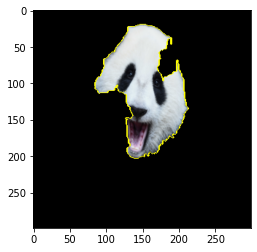

In [0]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

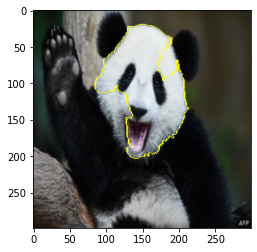

In [0]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

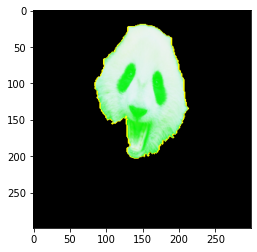

In [0]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=7, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

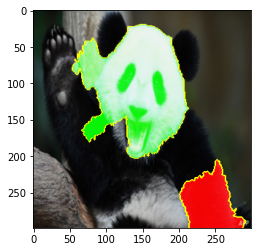

In [0]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

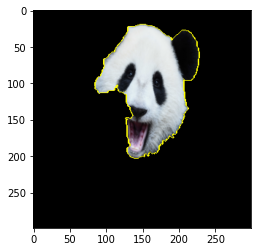

In [0]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=7, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

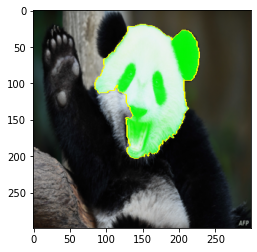

In [0]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=7, hide_rest=False)
plt.imshow(mark_boundaries(temp , mask))

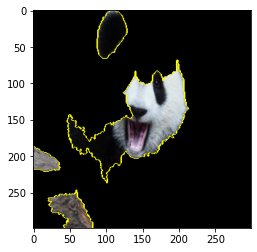

In [0]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], positive_only=True, num_features=7, hide_rest=True)
plt.imshow(mark_boundaries(temp , mask))

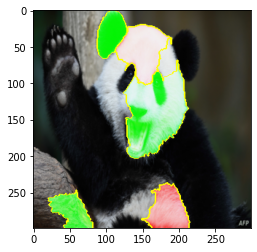

In [0]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], positive_only=False, num_features=7, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

**Optional**

If you like to learn about another promising approach to explaining NNs, you can read the paper [Axiomatic Attribution for Deep Networks](https://arxiv.org/abs/1703.01365).

# Section 3: Use Keras Tuner to optimize a small model


## 3a) When and why might Grid Search be less effective than Random Search when searching for useful hyperparameters for a Deep Learning model?



> If for certain hyperparameters there are ranges that will significantly make a difference on model performance (also meaning these hyperparameters are more important than others), then random search will have higher possibility to find out the useful ranges for these parameters.  
![alt text](https://miro.medium.com/proxy/1*ZTlQm_WRcrNqL-nLnx6GJA.png)




**3b) Add one or more code cells below in which you complete the following:**
- Install Keras Tuner
- Write a CNN to classify images from CIFAR-10 
- Use Keras Tuner to search for at least three optimal hyperpameters for your model (eg, number of layers, number of filters per layer, dropout rate, etc)



In [0]:
# TODO: your code here
# You may add additional code cells if helpful
!pip install -U keras-tuner

     |████████████████████████████████| 61kB 4.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=43caea16619e16a082b85ab3f4e127c2f99086542324bcfc89f45819626831f4
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=cbbc2f9a0896120e2fc4e062aa699668a2c53c1f890efe498d25128213f1dfac
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
from tensorflow.keras import models,optimizers,layers
import tensorflow as tf

def tune_optimizer_model(hp):
  # ======= model definition ============ #
  # conv,conv,maxpool,dropout,conv,flatten,dense,dropout,dense
  model = models.Sequential()
  model.add(
      layers.Conv2D(
          filters = hp.Choice(
              'num_filters',
              values = [16,32,64,128],
              default = 64
              ),
          activation = 'relu',
          kernel_size = 3
      )
  )
  model.add(
      layers.Conv2D(
          filters = hp.Choice(
              'num_filters',
              values = [16,32,64,128],
              default = 64
              ),
          activation = 'relu',
          kernel_size = 3
      )
  )
  model.add(layers.MaxPooling2D(pool_size=2))
  model.add(
      layers.Dropout(
          rate = hp.Float(
              'dropout_1',
              min_value = 0.0,
              max_value = 0.5,
              step = 0.05
          )
      )
  )
  model.add(
      layers.Conv2D(
          filters = hp.Choice(
              'num_filters',
              values = [16,32,64,128],
              default = 64
              ),
          activation = 'relu',
          kernel_size = 3
      )
  )
  model.add(layers.Flatten()),
  model.add(
      layers.Dense(
          units = 64
          
            # hp.Int(
            #     'units',
            #     min_value = 32,
            #     max_value = 512,
            #     step = 32,
            #     default = 128
            # )
          ,
          activation = hp.Choice(
              'dense_activation',
              values = ['relu','tanh','sigmoid','selu'],
              default = 'relu'
          )
      )
  )
  model.add(
      layers.Dropout(
          rate = 0.25
          #   hp.Float(
          #     'dropout_2',
          #     min_value = 0.0,
          #     max_value = 0.5,
          #     step = 0.05
          # )
      )
  )
  model.add(layers.Dense(10, activation='softmax'))

  # ======= compile ============ #
  
  model.compile(
      optimizer= tf.keras.optimizers.Adam(
          hp.Float(
              'learning_rate',
              min_value = 1e-4,
              max_value = 1e-2,
              sampling = 'LOG',
              default = 1e-3
          )
      ),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  return model


In [0]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    tune_optimizer_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='randomsearch',
    project_name='cifar10')
tuner.search_space_summary()

In [0]:
tuner.search(xtrain, ytrain,
             epochs=6,
             validation_data=(xtest, ytest))

tuner.results_summary()

Epoch 1/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6496 - accuracy: 0.3913 - val_loss: 1.3594 - val_accuracy: 0.5017
Epoch 2/6
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3614 - accuracy: 0.5092 - val_loss: 1.1998 - val_accuracy: 0.5756
Epoch 3/6
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2392 - accuracy: 0.5587 - val_loss: 1.1985 - val_accuracy: 0.5825
Epoch 4/6
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1696 - accuracy: 0.5849 - val_loss: 1.0893 - val_accuracy: 0.6158
Epoch 5/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1218 - accuracy: 0.6025 - val_loss: 1.0321 - val_accuracy: 0.6332
Epoch 6/6
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0839 - accuracy: 0.6165 - val_loss: 1.0464 - val_accuracy: 0.6371


Epoch 1/6
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6736 - accuracy: 0.3818 - val_loss: 1.2446 - val_accuracy: 0.5541
Epoch 2/6
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3132 - accuracy: 0.5224 - val_loss: 1.0869 - val_accuracy: 0.6118
Epoch 3/6
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1760 - accuracy: 0.5730 - val_loss: 0.9986 - val_accuracy: 0.6547
Epoch 4/6
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0821 - accuracy: 0.6089 - val_loss: 0.9203 - val_accuracy: 0.6759
Epoch 5/6
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0090 - accuracy: 0.6369 - val_loss: 0.9022 - val_accuracy: 0.6938
Epoch 6/6
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9501 - accuracy: 0.6561 - val_loss: 0.8690 - val_accuracy: 0.6995


Epoch 1/6
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6225 - accuracy: 0.4079 - val_loss: 1.2850 - val_accuracy: 0.5529
Epoch 2/6
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2951 - accuracy: 0.5402 - val_loss: 1.0839 - val_accuracy: 0.6219
Epoch 3/6
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1297 - accuracy: 0.6029 - val_loss: 1.0043 - val_accuracy: 0.6491
Epoch 4/6
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0220 - accuracy: 0.6411 - val_loss: 0.9256 - val_accuracy: 0.6785
Epoch 5/6
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9449 - accuracy: 0.6692 - val_loss: 0.8659 - val_accuracy: 0.6974
Epoch 6/6
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8842 - accuracy: 0.6914 - val_loss: 0.8780 - val_accuracy: 0.6930


Epoch 1/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7124 - accuracy: 0.3776 - val_loss: 1.4054 - val_accuracy: 0.4925
Epoch 2/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4190 - accuracy: 0.4877 - val_loss: 1.2992 - val_accuracy: 0.5346
Epoch 3/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3306 - accuracy: 0.5246 - val_loss: 1.2178 - val_accuracy: 0.5712
Epoch 4/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2686 - accuracy: 0.5471 - val_loss: 1.2529 - val_accuracy: 0.5466
Epoch 5/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2272 - accuracy: 0.5604 - val_loss: 1.1833 - val_accuracy: 0.5776
Epoch 6/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1979 - accuracy: 0.5731 - val_loss: 1.1667 - val_accuracy: 0.5793


Epoch 1/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4147 - accuracy: 0.4890 - val_loss: 1.0994 - val_accuracy: 0.6123
Epoch 2/6
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0412 - accuracy: 0.6371 - val_loss: 0.9518 - val_accuracy: 0.6708
Epoch 3/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9182 - accuracy: 0.6797 - val_loss: 0.9141 - val_accuracy: 0.6774
Epoch 4/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8518 - accuracy: 0.7022 - val_loss: 0.9265 - val_accuracy: 0.6770
Epoch 5/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7967 - accuracy: 0.7248 - val_loss: 0.8638 - val_accuracy: 0.7013
Epoch 6/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7458 - accuracy: 0.7399 - val_loss: 0.8701 - val_accuracy: 0.7081


Epoch 1/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9009 - accuracy: 0.2844 - val_loss: 1.7520 - val_accuracy: 0.3510
Epoch 2/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7534 - accuracy: 0.3447 - val_loss: 1.7330 - val_accuracy: 0.3690
Epoch 3/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7242 - accuracy: 0.3587 - val_loss: 1.8544 - val_accuracy: 0.3171
Epoch 4/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7032 - accuracy: 0.3679 - val_loss: 1.9453 - val_accuracy: 0.2997
Epoch 5/6
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6817 - accuracy: 0.3771 - val_loss: 1.7829 - val_accuracy: 0.3619
Epoch 6/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6615 - accuracy: 0.3863 - val_loss: 1.7796 - val_accuracy: 0.3634


Epoch 1/6
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6086 - accuracy: 0.4175 - val_loss: 1.2709 - val_accuracy: 0.5472
Epoch 2/6
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2382 - accuracy: 0.5604 - val_loss: 1.0728 - val_accuracy: 0.6275
Epoch 3/6
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0656 - accuracy: 0.6292 - val_loss: 0.9582 - val_accuracy: 0.6649
Epoch 4/6
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9581 - accuracy: 0.6687 - val_loss: 0.9130 - val_accuracy: 0.6823
Epoch 5/6
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8854 - accuracy: 0.6947 - val_loss: 0.8533 - val_accuracy: 0.7096
Epoch 6/6
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8333 - accuracy: 0.7123 - val_loss: 0.8226 - val_accuracy: 0.7212


Epoch 1/6
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8292 - accuracy: 0.3275 - val_loss: 1.5658 - val_accuracy: 0.4221
Epoch 2/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5988 - accuracy: 0.4214 - val_loss: 1.4728 - val_accuracy: 0.4735
Epoch 3/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5257 - accuracy: 0.4515 - val_loss: 1.4909 - val_accuracy: 0.4663
Epoch 4/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5061 - accuracy: 0.4584 - val_loss: 1.4456 - val_accuracy: 0.4786
Epoch 5/6
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4862 - accuracy: 0.4685 - val_loss: 1.3802 - val_accuracy: 0.5033
Epoch 6/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4788 - accuracy: 0.4689 - val_loss: 1.4254 - val_accuracy: 0.4803


Epoch 1/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7755 - accuracy: 0.3447 - val_loss: 1.5046 - val_accuracy: 0.4511
Epoch 2/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5282 - accuracy: 0.4436 - val_loss: 1.3789 - val_accuracy: 0.4955
Epoch 3/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4259 - accuracy: 0.4839 - val_loss: 1.3157 - val_accuracy: 0.5268
Epoch 4/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3537 - accuracy: 0.5135 - val_loss: 1.2311 - val_accuracy: 0.5533
Epoch 5/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3161 - accuracy: 0.5300 - val_loss: 1.2239 - val_accuracy: 0.5658
Epoch 6/6
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2988 - accuracy: 0.5362 - val_loss: 1.2473 - val_accuracy: 0.5640


Epoch 1/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5308 - accuracy: 0.4494 - val_loss: 1.2031 - val_accuracy: 0.5751
Epoch 2/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1244 - accuracy: 0.6072 - val_loss: 0.9500 - val_accuracy: 0.6726
Epoch 3/6
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9337 - accuracy: 0.6751 - val_loss: 0.8677 - val_accuracy: 0.7028
Epoch 4/6
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8357 - accuracy: 0.7123 - val_loss: 0.8141 - val_accuracy: 0.7194
Epoch 5/6
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7530 - accuracy: 0.7428 - val_loss: 0.7864 - val_accuracy: 0.7339
Epoch 6/6
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6921 - accuracy: 0.7615 - val_loss: 0.7512 - val_accuracy: 0.7411


Epoch 1/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4756 - accuracy: 0.4653 - val_loss: 1.1520 - val_accuracy: 0.5924
Epoch 2/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1341 - accuracy: 0.6014 - val_loss: 1.0591 - val_accuracy: 0.6303
Epoch 3/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0240 - accuracy: 0.6421 - val_loss: 1.0248 - val_accuracy: 0.6420
Epoch 4/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9595 - accuracy: 0.6632 - val_loss: 0.9640 - val_accuracy: 0.6636
Epoch 5/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9129 - accuracy: 0.6804 - val_loss: 0.9257 - val_accuracy: 0.6787
Epoch 6/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8706 - accuracy: 0.6936 - val_loss: 0.9004 - val_accuracy: 0.6835


Epoch 1/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4891 - accuracy: 0.4615 - val_loss: 1.1917 - val_accuracy: 0.5748
Epoch 2/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1309 - accuracy: 0.6041 - val_loss: 1.0260 - val_accuracy: 0.6372
Epoch 3/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9968 - accuracy: 0.6516 - val_loss: 0.9385 - val_accuracy: 0.6717
Epoch 4/6
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9163 - accuracy: 0.6806 - val_loss: 0.9484 - val_accuracy: 0.6715
Epoch 5/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8499 - accuracy: 0.7019 - val_loss: 0.8561 - val_accuracy: 0.7042
Epoch 6/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8038 - accuracy: 0.7212 - val_loss: 0.8477 - val_accuracy: 0.7081


Epoch 1/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7380 - accuracy: 0.3622 - val_loss: 1.5202 - val_accuracy: 0.4513
Epoch 2/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4929 - accuracy: 0.4643 - val_loss: 1.4409 - val_accuracy: 0.4821
Epoch 3/6
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4196 - accuracy: 0.4929 - val_loss: 1.4015 - val_accuracy: 0.4982
Epoch 4/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3823 - accuracy: 0.5113 - val_loss: 1.3391 - val_accuracy: 0.5396
Epoch 5/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3653 - accuracy: 0.5179 - val_loss: 1.2973 - val_accuracy: 0.5440
Epoch 6/6
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3549 - accuracy: 0.5226 - val_loss: 1.4585 - val_accuracy: 0.5024


Epoch 1/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6760 - accuracy: 0.3878 - val_loss: 1.4396 - val_accuracy: 0.4860
Epoch 2/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4069 - accuracy: 0.4960 - val_loss: 1.3546 - val_accuracy: 0.5175
Epoch 3/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3117 - accuracy: 0.5350 - val_loss: 1.2460 - val_accuracy: 0.5637
Epoch 4/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2418 - accuracy: 0.5594 - val_loss: 1.2339 - val_accuracy: 0.5672
Epoch 5/6
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2100 - accuracy: 0.5738 - val_loss: 1.1610 - val_accuracy: 0.5890
Epoch 6/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1922 - accuracy: 0.5778 - val_loss: 1.1783 - val_accuracy: 0.5815


Epoch 1/6
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3103 - accuracy: 0.0991 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/6
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3047 - accuracy: 0.0993 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 3/6
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3044 - accuracy: 0.0989 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 4/6
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3044 - accuracy: 0.1001 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 5/6
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3045 - accuracy: 0.0997 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 6/6
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3044 - accuracy: 0.0998 - val_loss: 2.3050 - val_accuracy: 0.1000


Epoch 1/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5793 - accuracy: 0.4274 - val_loss: 1.2200 - val_accuracy: 0.5712
Epoch 2/6
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1565 - accuracy: 0.5941 - val_loss: 1.0200 - val_accuracy: 0.6424
Epoch 3/6
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9737 - accuracy: 0.6623 - val_loss: 0.9671 - val_accuracy: 0.6690
Epoch 4/6
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8472 - accuracy: 0.7055 - val_loss: 0.8833 - val_accuracy: 0.6978
Epoch 5/6
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7482 - accuracy: 0.7408 - val_loss: 0.8980 - val_accuracy: 0.6929
Epoch 6/6
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6705 - accuracy: 0.7680 - val_loss: 0.8747 - val_accuracy: 0.6956


Epoch 1/6
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3063 - accuracy: 0.0985 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/6
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3041 - accuracy: 0.0978 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 3/6
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3039 - accuracy: 0.0996 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 4/6
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3039 - accuracy: 0.0999 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 5/6
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3039 - accuracy: 0.1012 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 6/6
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3038 - accuracy: 0.1020 - val_loss: 2.3042 - val_accuracy: 0.1000


Epoch 1/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6612 - accuracy: 0.3952 - val_loss: 1.3246 - val_accuracy: 0.5193
Epoch 2/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.3065 - accuracy: 0.5351 - val_loss: 1.1443 - val_accuracy: 0.5946
Epoch 3/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1826 - accuracy: 0.5820 - val_loss: 1.2047 - val_accuracy: 0.5818
Epoch 4/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1173 - accuracy: 0.6064 - val_loss: 1.0776 - val_accuracy: 0.6199
Epoch 5/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0806 - accuracy: 0.6175 - val_loss: 1.0420 - val_accuracy: 0.6354
Epoch 6/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0568 - accuracy: 0.6283 - val_loss: 1.0123 - val_accuracy: 0.6423


Epoch 1/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4989 - accuracy: 0.4585 - val_loss: 1.1686 - val_accuracy: 0.5914
Epoch 2/6
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0979 - accuracy: 0.6165 - val_loss: 0.9649 - val_accuracy: 0.6656
Epoch 3/6
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9278 - accuracy: 0.6802 - val_loss: 0.8766 - val_accuracy: 0.6941
Epoch 4/6
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8256 - accuracy: 0.7156 - val_loss: 0.8198 - val_accuracy: 0.7175
Epoch 5/6
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7412 - accuracy: 0.7470 - val_loss: 0.7812 - val_accuracy: 0.7315
Epoch 6/6
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6766 - accuracy: 0.7676 - val_loss: 0.7813 - val_accuracy: 0.7328


Epoch 1/6
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4609 - accuracy: 0.4749 - val_loss: 1.1764 - val_accuracy: 0.5848
Epoch 2/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1270 - accuracy: 0.6047 - val_loss: 1.0424 - val_accuracy: 0.6371
Epoch 3/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0108 - accuracy: 0.6463 - val_loss: 1.0177 - val_accuracy: 0.6467
Epoch 4/6
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9367 - accuracy: 0.6730 - val_loss: 0.9583 - val_accuracy: 0.6676
Epoch 5/6
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8846 - accuracy: 0.6921 - val_loss: 0.9424 - val_accuracy: 0.6743
Epoch 6/6
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8424 - accuracy: 0.7067 - val_loss: 0.9199 - val_accuracy: 0.6806


INFO:tensorflow:Oracle triggered exit


In [0]:
best_model = tuner.get_best_models(num_models=1)[0]

In [0]:
best_model.fit(xtrain,
               ytrain,
               epochs=10, 
               validation_data=(xtest, ytest), 
               )

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6144 - accuracy: 0.7894 - val_loss: 0.7630 - val_accuracy: 0.7444
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5573 - accuracy: 0.8109 - val_loss: 0.7355 - val_accuracy: 0.7526
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4900 - accuracy: 0.8319 - val_loss: 0.7423 - val_accuracy: 0.7547
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4504 - accuracy: 0.8442 - val_loss: 0.7535 - val_accuracy: 0.7539
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3952 - accuracy: 0.8653 - val_loss: 0.7960 - val_accuracy: 0.7504
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3633 - accuracy: 0.8752 - val_loss: 0.8027 - val_accuracy: 0.7500
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4092 - accuracy: 0.8559 - val_loss: 0.7548 -

## 3c)
- What were the optimal hyperparmeters you found?
- Do they make sense (e.g., are they similar to parameters you might have picked yourself?)




>Best Parameters in Trial summary:

>>Trial ID: 077523f0f1402159b4b03eaeed6191bc

>>Score: 0.741100013256073

>>Best step: 0

>Hyperparameters:

>>dense_activation: selu

>>dropout_1: 0.45

>>learning_rate: 0.000134820344475202

>>num_filters: 128


> The validation accuracy is significantly better than mine and the parameters are different from mine.

---

# Starter code for TensorBoard
The following code shows how to use [TensorBoard](https://www.tensorflow.org/tensorboard) to display the results from an experiment comparing two learning curves. Please note, there are three ways to use TensorBoard. 
- You may install TensorBoard locally on your laptop
- You can run TensorBoard inside Colab (currently buggy)
- You can use TensorBoard.dev (this is the approach you should use for this assignment). 

In [0]:
%tensorflow_version 2.x

In [0]:
!pip install -U tensorboard

Requirement already up-to-date: tensorboard in /usr/local/lib/python3.6/dist-packages (2.2.0)


In [0]:
import tensorflow as tf

**Caution**. The following cell will delete any existing TensorBoard logs. If you're running this on your local machine, please be careful executing it.

In [0]:
!rm -rf ./tensorboard-logs/ # Clear any logs from previous runs

Import a dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


## First style
The following code shows how to use TensorBoard with ```model.fit```.

In [0]:
from tensorflow.keras.layers import Dense, Flatten

def create_model():
  model = tf.keras.models.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='softmax'),
  ])
  return model

Create a logs directory

In [0]:
import datetime 
import os
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

Writing logs to ./tensorboard-logs/20200324-200129


### Run an experiment
The name of the experiment is given by the path of the logs directory (here, "exp1"). You'll want to use something more descriptive in your work (e.g., "swish-cifar-10").

In [0]:
from tensorflow.keras.optimizers import SGD

model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.0, nesterov=False) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "exp1")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/sample - loss: 2.5961 - accuracy: 0.5289 - val_loss: 1.4476 - val_accuracy: 0.7646
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 1.1920 - accuracy: 0.7905 - val_loss: 0.9579 - val_accuracy: 0.8228
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.8922 - accuracy: 0.8233 - val_loss: 0.7772 - val_accuracy: 0.8425
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.7585 - accuracy: 0.8390 - val_loss: 0.6813 - val_accuracy: 0.8546
Epoch 5/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6804 - accuracy: 0.8488 - val_loss: 0.6207 - val_accuracy: 0.8621
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6284 - accuracy: 0.8561 - val_loss: 0.5782 - val_accuracy: 0.8670
Epoch 7/10
60000/60000 [==============================]

### Run a second experiment
Let's train another model, this time saving results to "exp2". Later, we'll be able to compare the learning curves of these experiments in TensorBoard.

In [0]:
model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "exp2")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.9008 - accuracy: 0.8109 - val_loss: 0.4870 - val_accuracy: 0.8790
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4607 - accuracy: 0.8808 - val_loss: 0.4043 - val_accuracy: 0.8951
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4059 - accuracy: 0.8913 - val_loss: 0.3705 - val_accuracy: 0.9006
Epoch 4/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3787 - accuracy: 0.8971 - val_loss: 0.3517 - val_accuracy: 0.9052
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3617 - accuracy: 0.9010 - val_loss: 0.3381 - val_accuracy: 0.9075
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3495 - accuracy: 0.9038 - val_loss: 0.3286 - val_accuracy: 0.9108
Epoch 7/10
60000/60000 [==============================] 

### Upload the logs to TensorBoard.dev, and compare the results
TensorBoard.dev is a hosted version of TensorBoard (see http://tensorboard.dev/ for details).

In [0]:
!tensorboard dev upload --logdir "$log_dir"


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorboard-logs/20200324-200129

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=uSENHv0tuSR6TtgedZ0FwyYPBBP7rU&prompt=consen

## Second style
Showing how to use TensorBoard with a Subclassed model and a GradientTape

Prepre the dataset

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_ds = train_ds.shuffle(60000).batch(32)
test_ds = test_ds.batch(32)

Define a simple model

In [0]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

model = MyModel()

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

Training and testing routines

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_fn(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_fn(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Prepare log writers (previously, these were handled by the callback)

In [0]:
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

train_writer = tf.summary.create_file_writer(os.path.join(log_dir, "train"))
test_writer = tf.summary.create_file_writer(os.path.join(log_dir, "test"))

Train and log summaries

In [0]:
EPOCHS = 10

for epoch in range(EPOCHS):
  
  for images, labels in train_ds:
    train_step(images, labels)
    
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
  
  with train_writer.as_default():
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', train_loss.result(), step=epoch)

    # ====
    # Demo: show how to use histogram summaries
    # Create and log some random data
    # Useful if you're attemping the extra credit question
    # ====
    data = tf.random.normal((32, 100))
    tf.summary.histogram('random', 
                         data,
                         step=epoch, 
                         description='Your description')
    
  with test_writer.as_default():
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    
  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

### Upload the logs to TensorBoard.dev

In [0]:
!tensorboard dev upload --logdir "$log_dir"